||||||||||||||||
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
||||||<h1>Jupiter Objects with Python</h1>||||<img src="https://articolidiastronomia.com/wp-content/uploads/2020/08/cropped-orologio-solare.jpg" alt="articolidiastronomia logo" style="height:50px; width:50px;"/>|| [articolidiastronomia.com](attachment:./articolidiastronomia.com) </br> Alessandro Fumagalli|||<img src="https://articolidiastronomia.com/wp-content/uploads/2021/01/licenza.png" alt="licenza" style="height:25px; width:120px;"/>||

### Import the modules needed for processing

In [22]:
import pandas as pd
import seaborn as sns

### Read MPC file with orbital data
- Data downloaded from https://cgi.minorplanetcenter.net/data

In [23]:
df = pd.read_csv("data/mpcorb_extended.csv", low_memory=False)
pd.set_option("display.max_columns", None)
df.head()

,H,G,Num_obs,rms,U,Arc_years,Perturbers,Perturbers_2,Number,Name,Principal_desig,Other_desigs,Epoch,M,Peri,Node,i,e,n,a,Ref,Num_opps,Computer,Hex_flags,Last_obs,Tp,Orbital_period,Perihelion_dist,Aphelion_dist,Semilatus_rectum,Synodic_period,Orbit_type,NEO_flag,One_km_NEO_flag,PHA_flag,Critical_list_numbered_object_flag,One_opposition_object_flag,Arc_length
0,3.32,0.15,7259.0,0.65,0,1801-2022,M-v,30l,(1),Ceres,A801 AA,"['A899 OF', '1943 XB']",2459800.5,334.32723,73.53158,80.26642,10.58680,0.078636,0.214181,2.766619,E2022-SB7,123,MPCLINUX,0000,2022-09-16,2.459920e+06,4.601761,2.549064,2.984174,1.374756,1.277642,MBA,NaN,NaN,NaN,NaN,NaN,NaN
1,4.12,0.15,8871.0,0.59,0,1804-2022,M-c,28k,(2),Pallas,A802 FA,NaN,2459800.5,315.09111,310.84262,172.91791,34.92715,0.229986,0.213851,2.769463,MPO710565,120,MPCLINUX,0000,2022-08-04,2.460011e+06,4.608859,2.132524,3.406402,1.311488,1.277096,MBA,NaN,NaN,NaN,NaN,NaN,NaN
2,5.13,0.15,7396.0,0.63,0,1804-2022,M-v,3El,(3),Juno,A804 RA,NaN,2459800.5,306.62243,247.80396,169.84591,12.99223,0.256775,0.225857,2.670422,MPO710565,113,MPCLINUX,0000,2022-08-30,2.460037e+06,4.363851,1.984725,3.356120,1.247176,1.297278,MBA,NaN,NaN,NaN,NaN,NaN,NaN
3,3.20,0.15,7508.0,0.63,0,1821-2022,M-p,18l,(4),Vesta,A807 FA,NaN,2459800.5,61.19232,151.25772,103.80084,7.14078,0.088402,0.271511,2.361987,E2022-T39,108,MPCLINUX,0000,2022-09-23,2.459575e+06,3.630081,2.153183,2.570791,1.171764,1.380216,MBA,NaN,NaN,NaN,NaN,NaN,NaN
4,7.02,0.15,3087.0,0.72,0,1845-2022,M-v,3El,(5),Astraea,A845 XA,['1969 SE'],2459800.5,208.56769,358.79230,141.56759,5.36542,0.188985,0.238175,2.577540,E2022-TC0,85,MPCLINUX,0000,2022-10-02,2.460436e+06,4.138168,2.090423,3.064657,1.242741,1.318657,MBA,NaN,NaN,NaN,NaN,NaN,NaN


### Show the size of dataframe in terms of numbers of records found

In [24]:
df.dropna()
df.shape

(1242255, 38)

### Pre processing
- Removed useless columns 
- Renamed orbit type
- List all different orbit types

In [25]:
#removed useless fields and rename others
df.drop(['NEO_flag','Critical_list_numbered_object_flag','One_opposition_object_flag'], axis=1, inplace=True)
df.drop(['One_km_NEO_flag','Computer','Number','U','PHA_flag', 'Hex_flags'], axis=1, inplace=True)
df.drop(['Ref','Arc_length','Tp','Num_opps','Perturbers_2','Perturbers','n'], axis=1, inplace=True)
df.drop(['Semilatus_rectum','Synodic_period','Peri','Node'], axis=1, inplace=True)
df.drop(['Last_obs','Epoch'], axis=1, inplace=True)
df.drop(['Num_obs','rms'], axis=1, inplace=True)

df.rename(columns={"Perihelion_dist": "q", "Aphelion_dist": "Q"}, inplace=True)
df["Orbit_type"].replace({"Object with perihelion distance < 1.665 AU": "q < 1.665 AU"}, inplace=True)
df["Orbit_type"].replace({"Jupiter Trojan": "Trojan"}, inplace=True)
df.Orbit_type.unique()

array(['MBA', 'Phocaea', 'q < 1.665 AU', 'Hilda', 'Amor', 'Hungaria',
       'Trojan', 'Apollo', 'Distant Object', 'Aten', 'Atira'],
      dtype=object)

### Filter on the following object types:

- Object type $\in$ {Hilda, Trojan, Hungaria}
- Object with $\sigma$ < 10

In [26]:
df[['Discover', 'Last_Obs']] = df['Arc_years'].str.split('-', n=1, expand=True)
df.head()

,H,G,Arc_years,Name,Principal_desig,Other_desigs,M,i,e,a,Orbital_period,q,Q,Orbit_type,Discover,Last_Obs
0,3.32,0.15,1801-2022,Ceres,A801 AA,"['A899 OF', '1943 XB']",334.32723,10.58680,0.078636,2.766619,4.601761,2.549064,2.984174,MBA,1801,2022
1,4.12,0.15,1804-2022,Pallas,A802 FA,NaN,315.09111,34.92715,0.229986,2.769463,4.608859,2.132524,3.406402,MBA,1804,2022
2,5.13,0.15,1804-2022,Juno,A804 RA,NaN,306.62243,12.99223,0.256775,2.670422,4.363851,1.984725,3.356120,MBA,1804,2022
3,3.20,0.15,1821-2022,Vesta,A807 FA,NaN,61.19232,7.14078,0.088402,2.361987,3.630081,2.153183,2.570791,MBA,1821,2022
4,7.02,0.15,1845-2022,Astraea,A845 XA,['1969 SE'],208.56769,5.36542,0.188985,2.577540,4.138168,2.090423,3.064657,MBA,1845,2022


In [27]:
MPC_Jupyter_no_MBA = df.apply(lambda r: r[~df['Orbit_type'].isin(['MBA'])])
MPC_Jupyter_ALL = MPC_Jupyter_no_MBA[MPC_Jupyter_no_MBA['H'] < (10 * MPC_Jupyter_no_MBA['H'].std())] 

In [28]:
MPC_Jupyter_H = df.apply(lambda r: r[df['Orbit_type'].isin(['Hungaria','Hilda','Trojan'])])
MPC_Jupyter_no_outliers = MPC_Jupyter_H[MPC_Jupyter_H['H'] < (10 * MPC_Jupyter_H['H'].std())] 

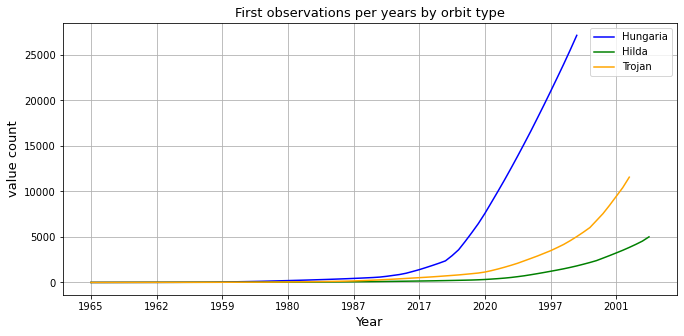

In [29]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

_Hungaria_disc = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Hungaria'])])['Discover']
_Hungaria_disc_count = _Hungaria_disc.value_counts().to_frame().sort_values(by=['Discover'])
_Hungaria_disc_cumsum = np.cumsum(_Hungaria_disc_count)
_Hungaria_disc_cumsum = _Hungaria_disc_cumsum.rename(columns={"Discover": "Hungaria"})

_Hilda_disc = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Hilda'])])['Discover']
_Hilda_disc_count = _Hilda_disc.value_counts().to_frame().sort_values(by=['Discover'])
_Hilda_disc_cumsum = np.cumsum(_Hilda_disc_count)
_Hilda_disc_cumsum = _Hilda_disc_cumsum.rename(columns={"Discover": "Hilda"})

_Trojan_disc = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Trojan'])])['Discover']
_Trojan_disc_count = _Trojan_disc.value_counts().to_frame().sort_values(by=['Discover'])
_Trojan_disc_cumsum = np.cumsum(_Trojan_disc_count)
_Trojan_disc_cumsum = _Trojan_disc_cumsum.rename(columns={"Discover": "Trojan"})

ax = _Hungaria_disc_cumsum.plot.line(figsize=(11, 5), color='blue')
_Hilda_disc_cumsum.plot(ax = ax, color='green')
_Trojan_disc_cumsum.plot(ax = ax, color='orange')

plt.grid()
plt.title('First observations per years by orbit type', fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("value count", fontsize=13)
plt.legend()
plt.savefig('observation_object_per_year.png', dpi=600)

### Distribution of objects per types

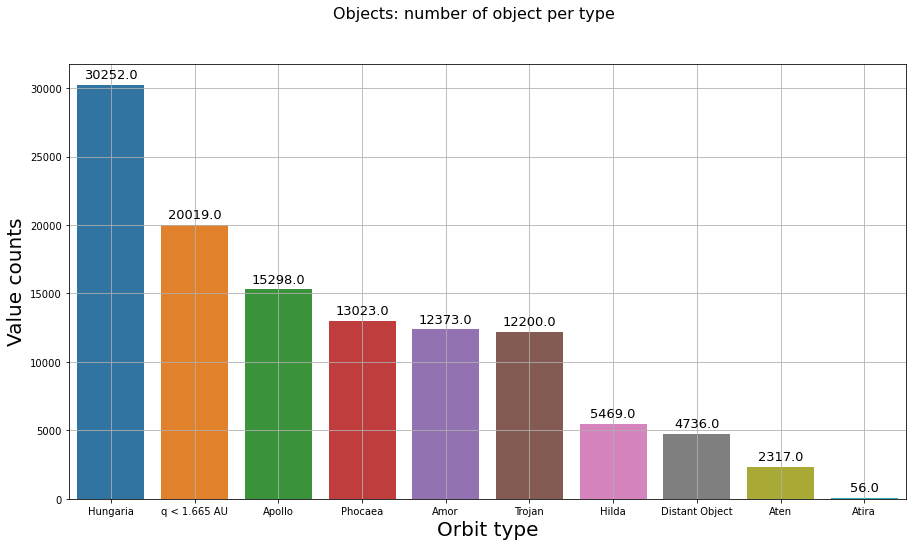

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
splot=sns.countplot(x="Orbit_type", data=MPC_Jupyter_ALL, order = MPC_Jupyter_ALL['Orbit_type'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, +10), textcoords = 'offset points')
plt.grid()
plt.suptitle('Objects: number of object per type', fontsize=16)
plt.xlabel("Orbit type", size=20)
plt.ylabel("Value counts", size=20)

plt.savefig('all_objects_distribution.png', dpi=600)

In [32]:
MPC_Jupyter_ALL_MBA = df[df['H'] < (10 * df['H'].std())] 

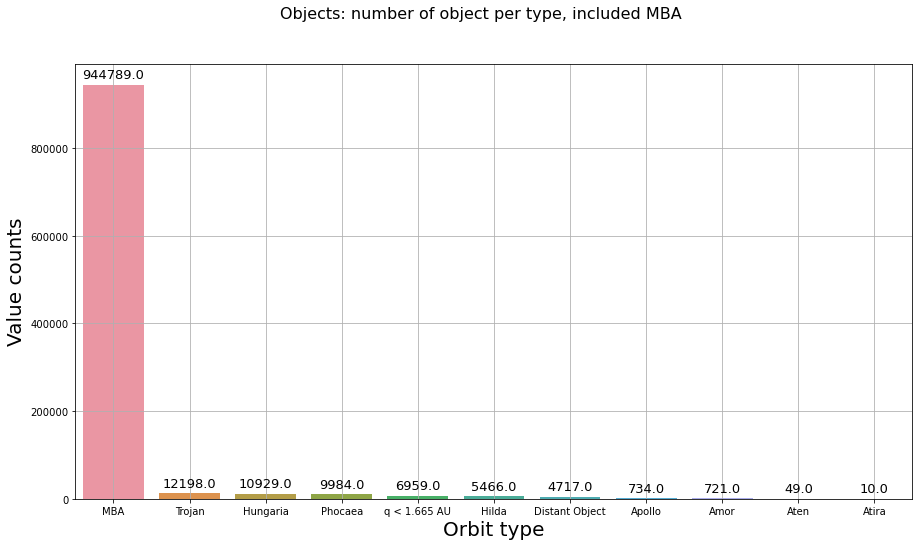

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
splot=sns.countplot(x="Orbit_type", data=MPC_Jupyter_ALL_MBA, order = MPC_Jupyter_ALL_MBA['Orbit_type'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, +10), textcoords = 'offset points')
plt.grid()
plt.suptitle('Objects: number of object per type, included MBA', fontsize=16)
plt.xlabel("Orbit type", size=20)
plt.ylabel("Value counts", size=20)

plt.savefig('all_MBA_objects_distribution.png', dpi=600)

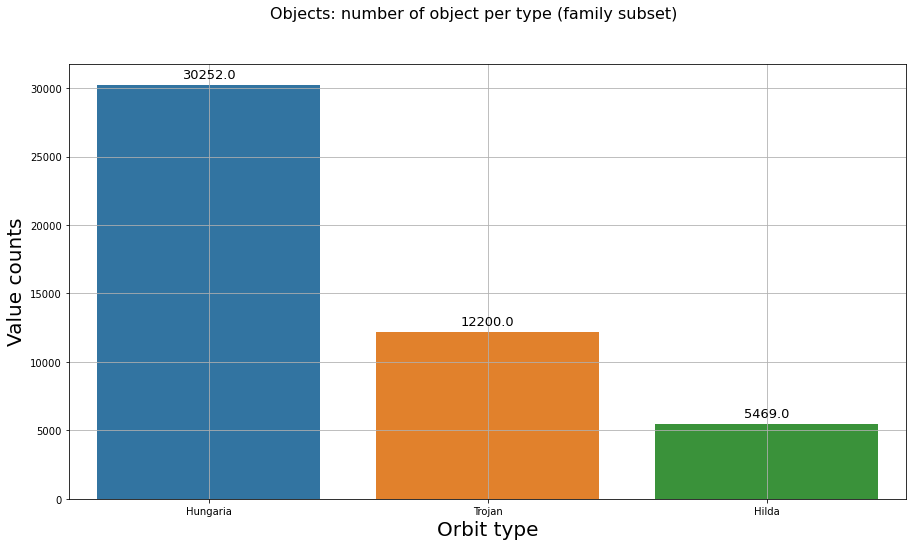

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
splot=sns.countplot(x="Orbit_type", data=MPC_Jupyter_no_outliers, order = MPC_Jupyter_no_outliers['Orbit_type'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, +10), textcoords = 'offset points')
plt.grid()
plt.suptitle('Objects: number of object per type (family subset)', fontsize=16)
plt.xlabel("Orbit type", size=20)
plt.ylabel("Value counts", size=20)

plt.savefig('jupyter_objects_distribution.png', dpi=600)

### Scatter diagrams

- *a* vs *e*
- *a* vs *i*

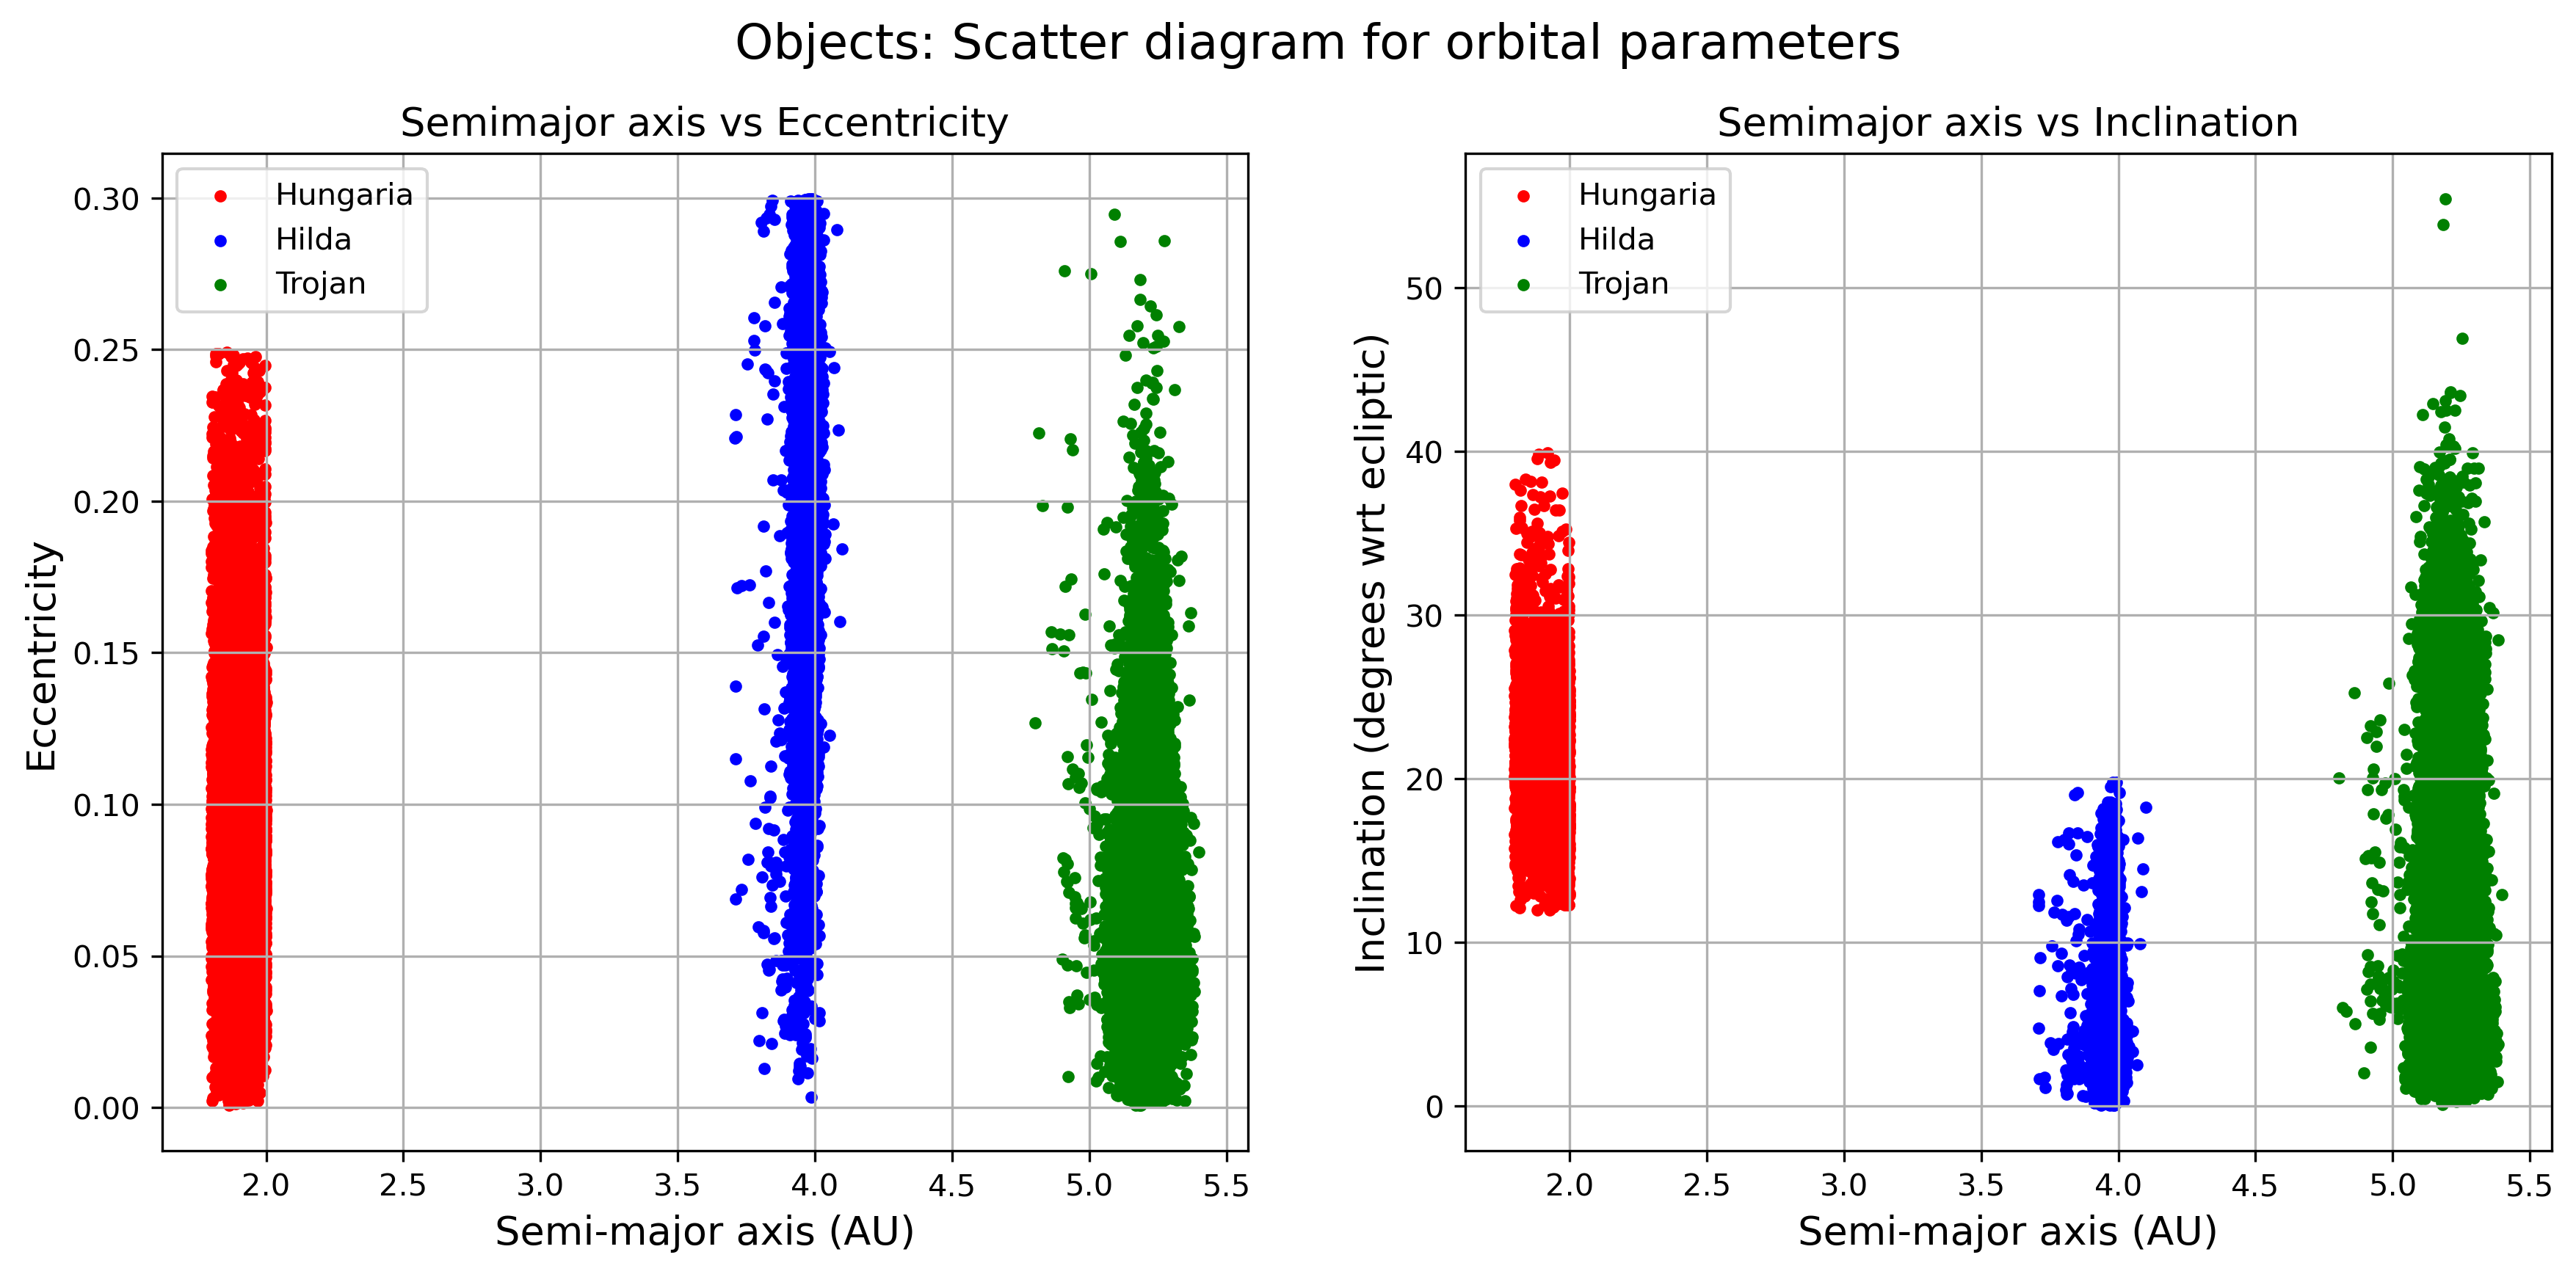

In [36]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

fig.suptitle('Objects: Scatter diagram for orbital parameters', fontsize=16)

MPC_Jupyter_Hungaria_a = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Hungaria'])])['a']
MPC_Jupyter_Hilda_a = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Hilda'])])['a']
MPC_Jupyter_Trojan_a = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Trojan'])])['a']

MPC_Jupyter_Hungaria_e = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Hungaria'])])['e']
MPC_Jupyter_Hilda_e = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Hilda'])])['e']
MPC_Jupyter_Trojan_e = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Trojan'])])['e']

MPC_Jupyter_Hungaria_i = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Hungaria'])])['i']
MPC_Jupyter_Hilda_i = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Hilda'])])['i']
MPC_Jupyter_Trojan_i = MPC_Jupyter_no_outliers.apply(lambda r: r[MPC_Jupyter_no_outliers['Orbit_type'].isin(['Trojan'])])['i']

ax1.set_title('Semimajor axis vs Eccentricity', fontsize=13)
x = ax1.scatter(MPC_Jupyter_Hungaria_a, MPC_Jupyter_Hungaria_e, color='r', marker=".", label="Hungaria")
y = ax1.scatter(MPC_Jupyter_Hilda_a, MPC_Jupyter_Hilda_e, color='b', marker=".", label="Hilda")
z = ax1.scatter(MPC_Jupyter_Trojan_a, MPC_Jupyter_Trojan_e, color='g', marker=".", label="Trojan")
ax1.set_xlabel("Semi-major axis (AU)", fontsize=13)
ax1.set_ylabel("Eccentricity", fontsize=13)
ax1.legend()
ax1.grid()

ax2.set_title('Semimajor axis vs Inclination', fontsize=13)
x_2 = ax2.scatter(MPC_Jupyter_Hungaria_a, MPC_Jupyter_Hungaria_i, color='r', marker=".", label="Hungaria")
y_2 = ax2.scatter(MPC_Jupyter_Hilda_a, MPC_Jupyter_Hilda_i, color='b', marker=".", label="Hilda")
z_2 = ax2.scatter(MPC_Jupyter_Trojan_a, MPC_Jupyter_Trojan_i, color='g', marker=".", label="Trojan")
ax2.set_xlabel("Semi-major axis (AU)", fontsize=13)
ax2.set_ylabel("Inclination (degrees wrt ecliptic)", fontsize=13)
ax2.legend()
ax2.grid()

fig.savefig('jupyter_objects_semi_major_axis.png', dpi=600)

### Distribution of absolute magnitude (H) per types

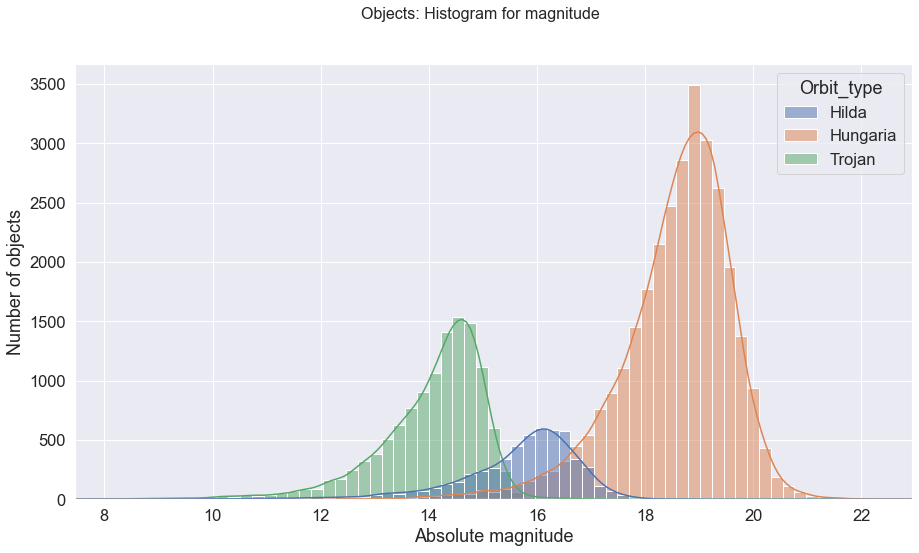

In [14]:
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(font_scale=1.5)  
plt.figure(figsize=(15,8))
p = sns.histplot(data=MPC_Jupyter_no_outliers, x="H", kde=True, hue="Orbit_type")
p.set(xlabel="Absolute magnitude", ylabel = "Number of objects")
plt.xlim([MPC_Jupyter_no_outliers.H.min(), MPC_Jupyter_no_outliers.H.max()])
plt.suptitle('Objects: Histogram for magnitude', fontsize=16)

plt.savefig("jupyter_objects_absolute_magnitude.png", dpi=600)

## Bibliography

- https://rebound.readthedocs.io/en/latest/ipython_examples/Churyumov-Gerasimenko/
- https://rebound.readthedocs.io/en/latest/ipython_examples/WHFast/
- https://rebound.readthedocs.io/en/latest/integrators/
- https://rebound.readthedocs.io/en/latest/simulationarchive/#reading-simulation-archives
- https://rebound.readthedocs.io/en/latest/ipython_examples/Testparticles/
- https://rebound.readthedocs.io/en/latest/units/
- https://notebook.community/dtamayo/rebound/ipython_examples/OrbitPlot
- https://astroquery.readthedocs.io/en/latest/jplsbdb/jplsbdb.html